# Predicting Repeat Donors

## 1. Data Loading and Initial Exploration

In [1]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('combined_donor_info.csv')

In [3]:
# Display the first few rows
df.head()

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,...,Public Transport,Worked from Home,Health Ins Pop,Health Ins,No Health Ins,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force
0,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2021.0,...,333.0,3432.0,20185.0,19509.0,676.0,19125.0,0.0,14080.0,1124.0,3921.0
1,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2020.0,...,241.0,2589.0,20035.0,19339.0,696.0,19017.0,0.0,14119.0,910.0,3988.0
2,1,NaN,Closed Won,Household,90069,Q3-2022,7/5/2022,200000.0,90069.0,2019.0,...,266.0,1963.0,20230.0,19348.0,882.0,19254.0,0.0,14444.0,738.0,4072.0
3,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.0,90069.0,2021.0,...,333.0,3432.0,20185.0,19509.0,676.0,19125.0,0.0,14080.0,1124.0,3921.0
4,1,NaN,Closed Won,Household,90069,Q3-2023,7/14/2023,200000.0,90069.0,2020.0,...,241.0,2589.0,20035.0,19339.0,696.0,19017.0,0.0,14119.0,910.0,3988.0


In [4]:
num_unique_donors = df['Masked Account ID'].nunique()

print(f"Number of unique donors: {num_unique_donors}")

Number of unique donors: 1321


In [5]:
# Check the data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Masked Account ID                  6290 non-null   int64  
 1   Maked Primary Campaign             4504 non-null   object 
 2   Stage                              6290 non-null   object 
 3   Account Type                       6290 non-null   object 
 4   Billing Zip/Postal Code            5789 non-null   object 
 5   Fiscal Period                      6290 non-null   object 
 6   Close Date                         6290 non-null   object 
 7   Amount                             6290 non-null   float64
 8   ZCTA                               5662 non-null   float64
 9   Year                               4780 non-null   float64
 10  Pop                                4780 non-null   float64
 11  Households                         4780 non-null   float

In [6]:
# Statistical summary of numerical columns
df.describe()

,Masked Account ID,Amount,ZCTA,Year,Pop,Households,HH Income,Education Years,Minority,Under 10,...,Public Transport,Worked from Home,Health Ins Pop,Health Ins,No Health Ins,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force
count,6290.000000,6.290000e+03,5662.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,...,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000,4780.000000
mean,472.245628,4.872656e+03,86845.853762,2020.005858,28881.300418,12046.998326,111.919718,15.002583,9451.154603,2873.945816,...,783.567992,2134.437657,28770.460042,27127.008159,1643.451883,24276.261925,19.048954,15465.512134,900.946653,7890.754184
std,386.745184,1.102559e+05,14516.508915,0.817756,16938.925375,6997.016492,24.481824,1.851160,9997.166591,1880.665073,...,1799.634002,1447.170498,16841.919092,15401.362681,2108.157507,14425.163945,50.577627,9690.622819,717.243955,4827.012112
min,1.000000,-2.000000e+02,10002.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,1.000000e+02,90046.000000,2019.000000,15292.000000,5887.000000,99.483534,14.783736,2555.000000,1524.000000,...,76.000000,1017.000000,15214.000000,14755.000000,529.000000,12641.250000,0.000000,7576.000000,356.000000,3924.000000
50%,359.000000,2.500000e+02,90074.000000,2020.000000,25988.000000,11775.000000,111.718232,15.497020,6354.500000,2932.000000,...,374.000000,1837.000000,25901.000000,25015.000000,807.500000,21542.000000,0.000000,14259.000000,762.000000,7203.000000
75%,777.750000,1.000000e+03,91031.000000,2021.000000,39755.000000,16375.000000,128.312519,15.917162,12812.000000,3747.000000,...,626.250000,3045.000000,39568.000000,35987.000000,2039.750000,32305.000000,21.000000,20221.000000,1234.000000,10126.000000
max,1321.000000,5.000029e+06,98607.000000,2021.000000,100225.000000,38263.000000,162.891641,16.751562,78022.000000,16452.000000,...,26134.000000,10835.000000,100146.000000,92505.000000,15502.000000,75511.000000,799.000000,55321.000000,4404.000000,34013.000000


In [7]:
# Percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values

Masked Account ID           0.000000
Maked Primary Campaign     28.394277
Stage                       0.000000
Account Type                0.000000
Billing Zip/Postal Code     7.965024
                             ...    
Labor Population           24.006359
Armed Forces               24.006359
Employed                   24.006359
Unemployed                 24.006359
Not in Labor Force         24.006359
Length: 87, dtype: float64

In [8]:
# Identify Features with Too Many Missing Values
features_to_consider_removing = missing_values[missing_values > 80].index.tolist()
features_to_consider_removing

[]

## 2. Data Cleaning and Preprocessing

In [9]:
# Create a copy of the original DataFrame for cleaning
df_copy = df.copy()

In [10]:
# Fill missing values appropriately
for column in df_copy.columns:
    if df_copy[column].dtype == 'object':  # Categorical data
        # Fill missing values with mode for categorical data
        df_copy[column] = df_copy[column].fillna(df_copy[column].mode()[0])
    else:  # Numerical data
        # Fill missing values with median for numerical data
        df_copy[column] = df_copy[column].fillna(df_copy[column].median())

In [11]:
# Verify if all missing values are handled
missing_values = df_copy.isnull().mean() * 100
missing_values

Masked Account ID          0.0
Maked Primary Campaign     0.0
Stage                      0.0
Account Type               0.0
Billing Zip/Postal Code    0.0
                          ... 
Labor Population           0.0
Armed Forces               0.0
Employed                   0.0
Unemployed                 0.0
Not in Labor Force         0.0
Length: 87, dtype: float64

In [12]:
# Handle numerical conversions for specific columns
conv_to_float = []
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        conv_to_float.append(col)

conv_to_float

['Maked Primary Campaign',
 'Stage',
 'Account Type',
 'Billing Zip/Postal Code',
 'Fiscal Period',
 'Close Date',
 'Minority %',
 'Poor %',
 'Poor Family %',
 'Car or Van %',
 'Public Transport %',
 'Health Ins %',
 'No Health Ins %',
 'Unemployed %',
 'Employed %',
 'Armed Forces %',
 'Not in Labor Force %',
 'Under 10 %',
 'Under 35 %',
 'Over 65 %',
 'Over 85 %',
 'High school %',
 'College %',
 '0-50k %',
 '50-100k %',
 '100-150k %',
 '150-200k %',
 '200k+ %']

In [13]:
exclude_cols = ['Maked Primary Campaign', 'Stage', 'Account Type', 'Billing Zip/Postal Code', 
                'Fiscal Period', 'Close Date']
conv_to_float = [col for col in conv_to_float if col not in exclude_cols]

for col in conv_to_float:
    # Replace '#DIV/0!' with NaN first
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    
    # Fill NaNs with the median of the column
    median_value = df_copy[col].median()
    df_copy[col] = df_copy[col].fillna(median_value)
    
    # Convert the column to float
    try:
        df_copy[col] = df_copy[col].astype(float)
        print(f"Column '{col}' successfully converted to float with median replacement.")
    except ValueError:
        print(f"Column '{col}' could not be converted to float.")

Column 'Minority %' successfully converted to float with median replacement.
Column 'Poor %' successfully converted to float with median replacement.
Column 'Poor Family %' successfully converted to float with median replacement.
Column 'Car or Van %' successfully converted to float with median replacement.
Column 'Public Transport %' successfully converted to float with median replacement.
Column 'Health Ins %' successfully converted to float with median replacement.
Column 'No Health Ins %' successfully converted to float with median replacement.
Column 'Unemployed %' successfully converted to float with median replacement.
Column 'Employed %' successfully converted to float with median replacement.
Column 'Armed Forces %' successfully converted to float with median replacement.
Column 'Not in Labor Force %' successfully converted to float with median replacement.
Column 'Under 10 %' successfully converted to float with median replacement.
Column 'Under 35 %' successfully converted t

In [14]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Amount', 'Pop', 'Households', 'HH Income', 'Education Years']
scaler = StandardScaler()
df_copy[numerical_columns] = scaler.fit_transform(df_copy[numerical_columns])

## 3. Feature Engineering

In [15]:
# Create large donation flag
threshold = df_copy['Amount'].quantile(0.95)
df_copy['large_donation_flag'] = (df_copy['Amount'] > threshold).astype(int)

# Count # of large donations
large_donations_count = df_copy[df_copy['large_donation_flag'] == 1].shape[0]  # This will give the count of rows
print(f"Number of large donations (above the 95th percentile): {large_donations_count}")

Number of large donations (above the 95th percentile): 257


In [16]:
# Process dates
df_copy['Close Date'] = pd.to_datetime(df_copy['Close Date'])
df_copy['Close Year'] = df_copy['Close Date'].dt.year
df_copy['Close Month'] = df_copy['Close Date'].dt.month
df_copy['Close DayOfWeek'] = df_copy['Close Date'].dt.dayofweek

In [17]:
donor_counts = df_copy['Masked Account ID'].value_counts()
donor_counts

Masked Account ID
420     156
96      108
1159    105
289      87
99       78
       ... 
922       1
776       1
925       1
744       1
754       1
Name: count, Length: 1321, dtype: int64

In [18]:
df_copy['repeat_donor'] = df_copy['Masked Account ID'].map(lambda x: 1 if donor_counts[x] > 1 else 0)

In [19]:
df_copy = df_copy.drop_duplicates(subset='Masked Account ID').reset_index(drop=True)

In [20]:
print(df_copy.shape)

# Count the number of 0s and 1s in the repeat_donor column
repeat_donor_counts = df_copy['repeat_donor'].value_counts()

# Print the counts
print("Number of 0s (non-repeat donors):", repeat_donor_counts.get(0, 0))
print("Number of 1s (repeat donors):", repeat_donor_counts.get(1, 0))

(1321, 92)
Number of 0s (non-repeat donors): 500
Number of 1s (repeat donors): 821


In [21]:
# Handle categorical variables
import category_encoders as ce

# Target encoding for high-cardinality columns
target_encoder = ce.TargetEncoder(cols=['Billing Zip/Postal Code'])
df_copy[['Billing Zip/Postal Code']] = target_encoder.fit_transform(
    df_copy[['Billing Zip/Postal Code']], 
    df_copy['Amount']
)

In [22]:
df_copy.head(1)

,Masked Account ID,Maked Primary Campaign,Stage,Account Type,Billing Zip/Postal Code,Fiscal Period,Close Date,Amount,ZCTA,Year,...,Labor Population,Armed Forces,Employed,Unemployed,Not in Labor Force,large_donation_flag,Close Year,Close Month,Close DayOfWeek,repeat_donor
0,1,Campaign One 2015,Closed Won,Household,0.013018,Q3-2022,2022-07-05,1.769909,90069.0,2021.0,...,19125.0,0.0,14080.0,1124.0,3921.0,1,2022,7,1,1


In [23]:
# One-hot encoding for categorical columns
df_copy = pd.get_dummies(df_copy, columns=['Account Type', 'Stage', 'Maked Primary Campaign'], 
                        drop_first=True)

## 4. Exploratory Data Analysis

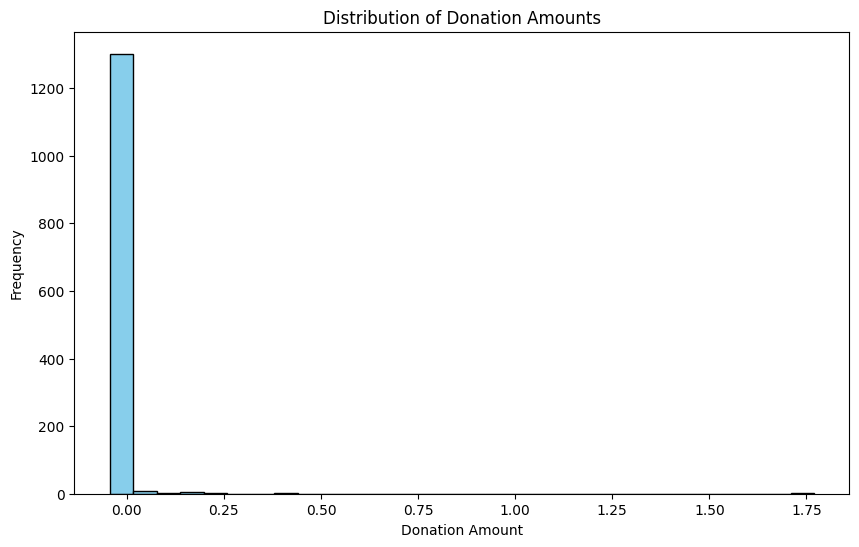

In [24]:
# Distribution of Donation Amounts
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


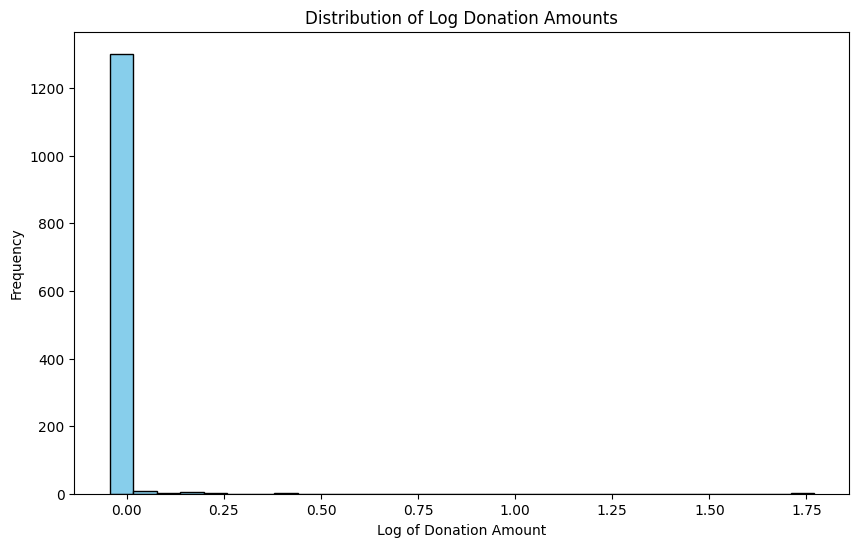

In [25]:
# Log-transformed Distribution
df['Amount'] = np.log1p(df['Amount'])
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Donation Amounts')
plt.xlabel('Log of Donation Amount')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Analysis of demographic correlations
percentage_columns = [
    'Minority %', 'Poor %', 'Poor Family %', 'Car or Van %', 
    'Public Transport %', 'Health Ins %', 'No Health Ins %', 
    'Unemployed %', 'Employed %', 'Armed Forces %', 'Not in Labor Force %', 
    'Under 10 %', 'Under 35 %', 'Over 65 %', 'Over 85 %', 
    'High school %', 'College %', '0-50k %', '50-100k %', 
    '100-150k %', '150-200k %', '200k+ %'
]

correlations = df_copy[['repeat_donor'] + percentage_columns].corr()
correlations

,repeat_donor,Minority %,Poor %,Poor Family %,Car or Van %,Public Transport %,Health Ins %,No Health Ins %,Unemployed %,Employed %,...,Under 35 %,Over 65 %,Over 85 %,High school %,College %,0-50k %,50-100k %,100-150k %,150-200k %,200k+ %
repeat_donor,1.000000,0.423781,0.283532,0.296223,0.112094,0.178170,-0.357137,0.376862,0.416851,-0.163656,...,0.013192,-0.025474,-0.018459,0.371838,-0.401590,0.349574,0.349789,0.177351,-0.050480,-0.325915
Minority %,0.423781,1.000000,0.665326,0.711543,0.066708,0.459459,-0.744837,0.753137,0.557337,-0.122741,...,0.371123,-0.313466,-0.188461,0.814853,-0.809954,0.723903,0.640699,0.045237,-0.276268,-0.729677
Poor %,0.283532,0.665326,1.000000,0.746850,-0.216928,0.444504,-0.695397,0.696945,0.616079,-0.261487,...,0.463387,-0.296627,-0.163754,0.723079,-0.695478,0.906784,0.499421,-0.355128,-0.579026,-0.713208
Poor Family %,0.296223,0.711543,0.746850,1.000000,0.140485,0.370581,-0.771183,0.771870,0.487471,-0.236039,...,0.329327,-0.310076,-0.250147,0.904161,-0.875487,0.739594,0.593031,-0.234651,-0.472210,-0.661911
Car or Van %,0.112094,0.066708,-0.216928,0.140485,1.000000,-0.616597,-0.114942,0.118877,-0.024395,-0.090595,...,-0.196947,0.018650,-0.097437,0.188677,-0.263471,-0.085777,0.216211,0.319435,0.104069,-0.086415
Public Transport %,0.178170,0.459459,0.444504,0.370581,-0.616597,1.000000,-0.447074,0.447823,0.260454,0.127937,...,0.299204,-0.260620,-0.171082,0.413058,-0.364114,0.431209,0.319820,-0.173855,-0.242297,-0.370070
Health Ins %,-0.357137,-0.744837,-0.695397,-0.771183,-0.114942,-0.447074,1.000000,-0.999443,-0.553725,0.074236,...,-0.302430,0.326848,0.257834,-0.867658,0.866285,-0.800676,-0.775980,0.097889,0.499497,0.806394
No Health Ins %,0.376862,0.753137,0.696945,0.771870,0.118877,0.447823,-0.999443,1.000000,0.565536,-0.081765,...,0.297009,-0.321608,-0.253611,0.870616,-0.870939,0.803734,0.779585,-0.086103,-0.492128,-0.808041
Unemployed %,0.416851,0.557337,0.616079,0.487471,-0.024395,0.260454,-0.553725,0.565536,1.000000,0.011532,...,0.266203,-0.316987,-0.181918,0.509552,-0.534738,0.647828,0.604274,0.002713,-0.249998,-0.646244
Employed %,-0.163656,-0.122741,-0.261487,-0.236039,-0.090595,0.127937,0.074236,-0.081765,0.011532,1.000000,...,0.358984,-0.662768,-0.589920,-0.221167,0.237091,-0.274085,0.187823,0.108977,0.172221,0.022217


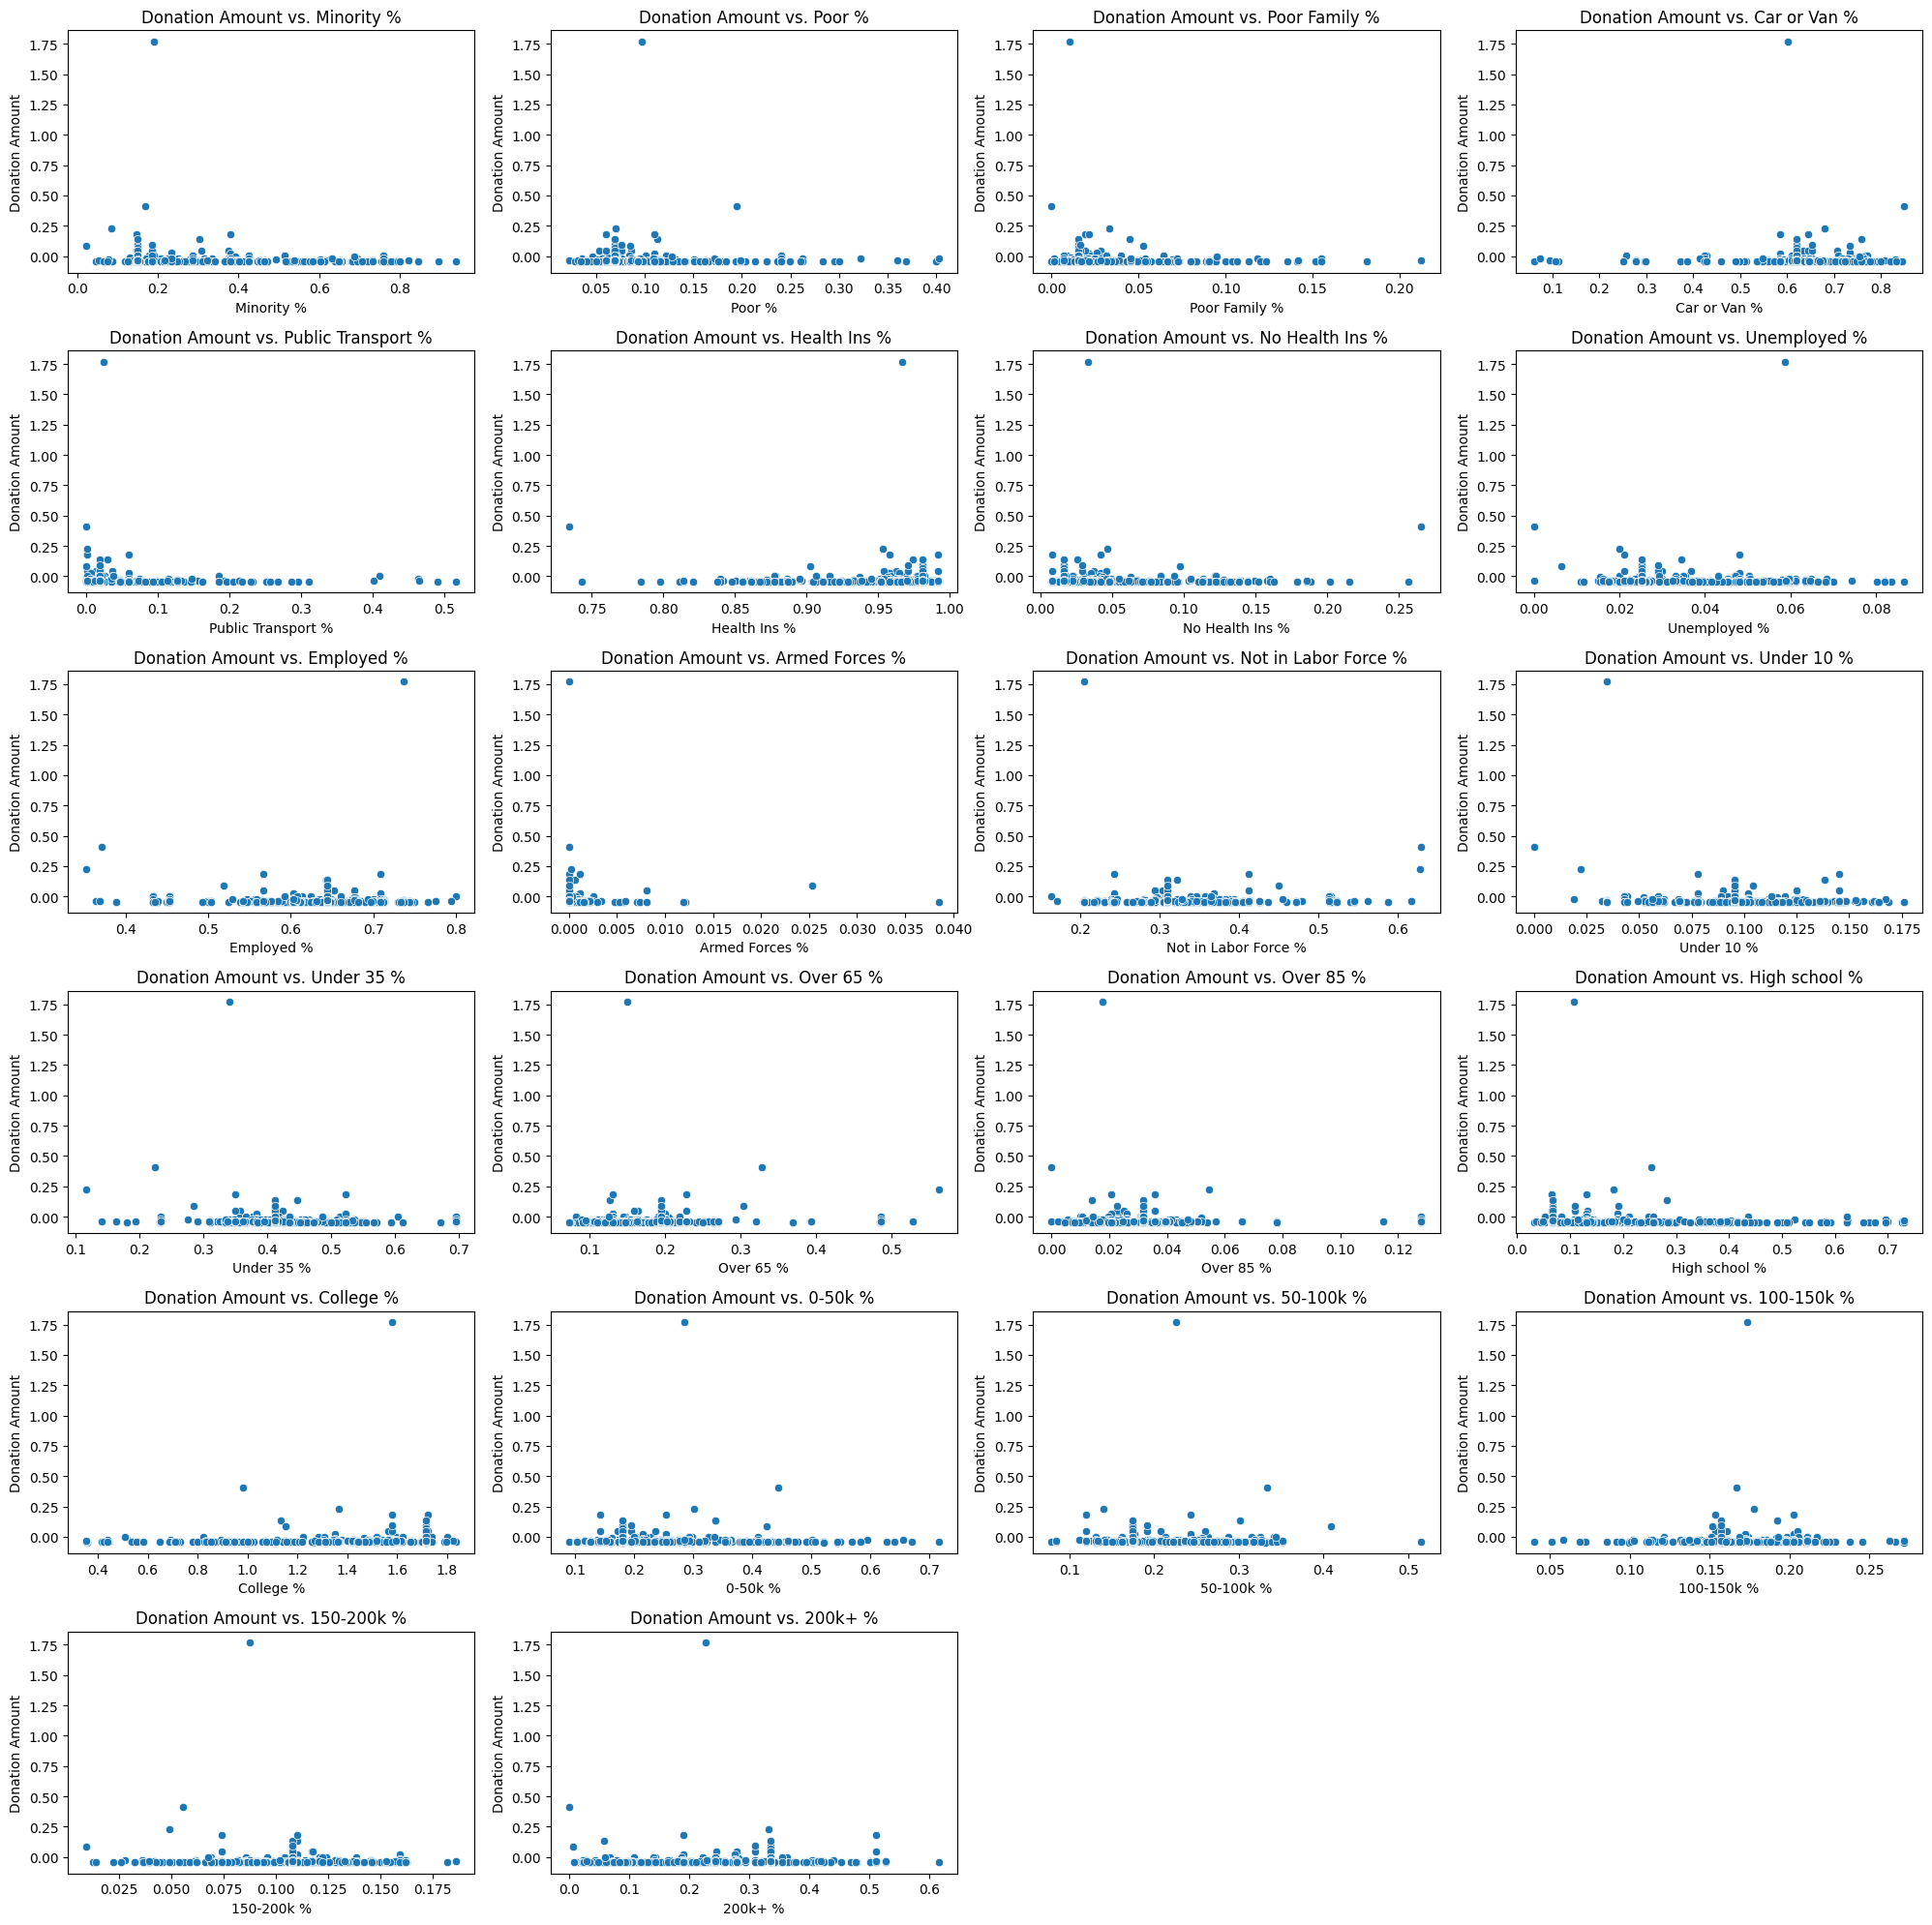

In [27]:
import seaborn as sns

# Visualization of demographic relationships
plt.figure(figsize=(20, 20)) 
for i, col in enumerate(percentage_columns, 1):
    plt.subplot(6, 4, i)
    sns.scatterplot(data=df_copy, x=col, y='Amount')
    plt.title(f'Donation Amount vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Donation Amount')
plt.tight_layout()
plt.show()

In [28]:
# Count of 1s
count_ones = df_copy['repeat_donor'].value_counts().get(1, 0)

# Count of 0s
count_zeros = df_copy['repeat_donor'].value_counts().get(0, 0)

# Count of nulls
count_nulls = df_copy['repeat_donor'].isnull().sum()

# Display the counts
print(f"Count of 1s: {count_ones}")
print(f"Count of 0s: {count_zeros}")
print(f"Count of null values: {count_nulls}")

Count of 1s: 821
Count of 0s: 500
Count of null values: 0


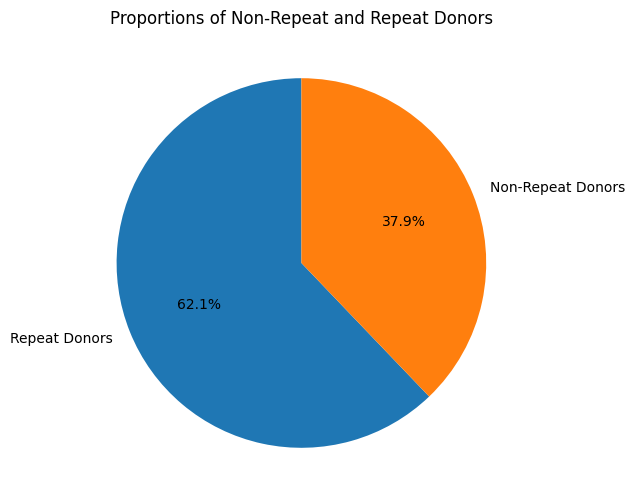

In [29]:
# Analyze repeat donor distribution
plt.figure(figsize=(10, 6))
plt.pie(
    [df_copy['repeat_donor'].value_counts().get(1, 0),
     df_copy['repeat_donor'].value_counts().get(0, 0)],
    labels=['Repeat Donors', 'Non-Repeat Donors'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proportions of Non-Repeat and Repeat Donors")
plt.show()

## 5. Feature Selection

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Initialize feature selector
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=10)

# Prepare features
X = df_copy.drop(columns=['Amount', 'Masked Account ID', 'repeat_donor', 'Close Date', 'Fiscal Period'])
y = df_copy['repeat_donor']

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Billing Zip/Postal Code', 'ZCTA', 'Year', 'Minority %',
       'Poor Family %', 'No Health Ins %', 'Unemployed %', 'Close Year',
       'Close Month', 'Close DayOfWeek'],
      dtype='object')


## 6. Model Development

In [33]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [34]:
# Prepare final feature set
X = df_copy[selected_features]
y = df_copy['repeat_donor']

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [37]:
# Initialize and train model
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                             n_iter=20, cv=5, scoring='f1', random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1')

In [38]:
# Make predictions
best_rf_model = rf_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

In [39]:
# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.77       153
           1       0.89      0.79      0.84       244

    accuracy                           0.81       397
   macro avg       0.80      0.81      0.80       397
weighted avg       0.82      0.81      0.81       397

AUC-ROC: 0.8812680810028929


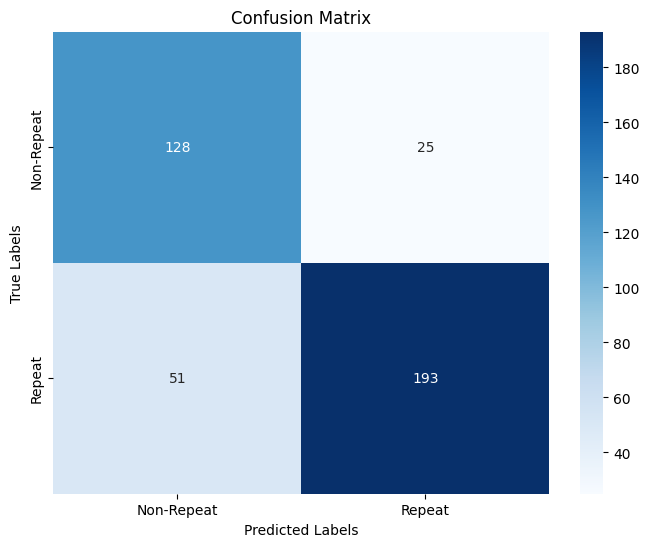

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Non-Repeat", "Repeat"], 
            yticklabels=["Non-Repeat", "Repeat"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

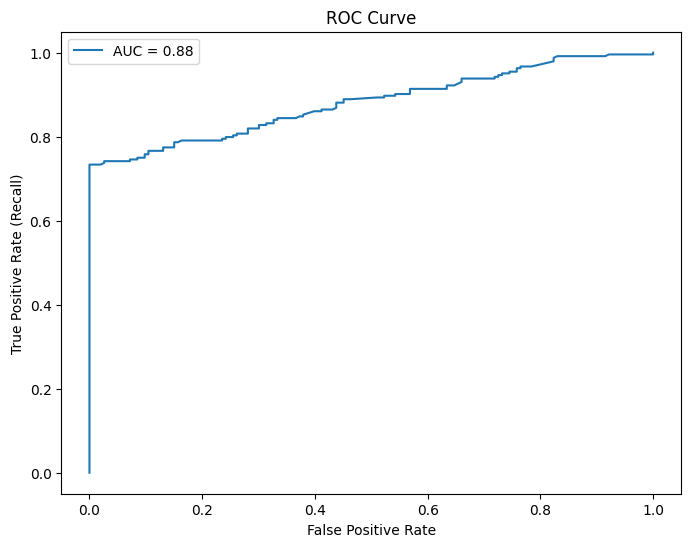

In [43]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

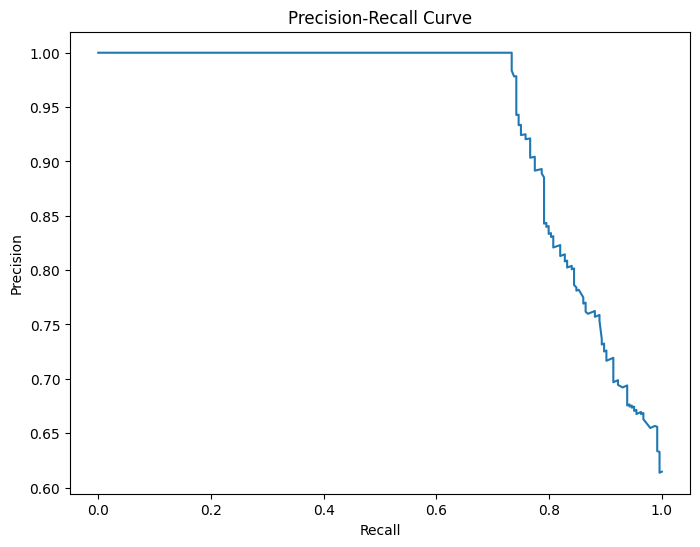

In [44]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()